In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
m = 2
g = -9.81

def generate(R, n, p0, v0, dt=0.01):
    pos = np.zeros(n)
    pos[0] = p0
    vel = np.zeros(n)
    vel[0] = v0
    acc = np.zeros(n)
    acc[0] = (g - vel[0] * R) / m
    for i in range(n-1):
        acc[i+1] = (g - vel[i] * R) / m
        vel[i+1] = vel[i] + acc[i+1] * dt
        pos[i+1] = pos[i] + vel[i+1] * dt
        
    return pos, vel, acc

## Easy

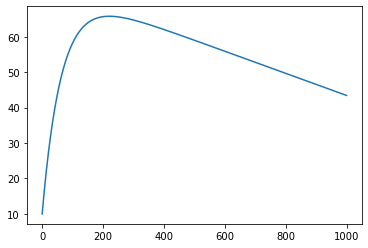

In [10]:
pos, vel, acc = generate(3.141592, 1000, 10, 100)
plt.plot(pos)
df = pd.DataFrame([pos, vel, acc]).T
df = df.rename(columns={0: "pos", 1: "vel", 2: "acc"})
df.to_csv("task1.txt", index=False)

In [13]:
df = pd.read_csv("task1.txt")
vel = np.array(df["vel"])
R_ans = g/vel[-1]
print(R_ans)
m_ans = (g - vel[0] * R_ans) / acc[0]
print(m_ans)

3.141606022822315
2.000008656886096


## Medium

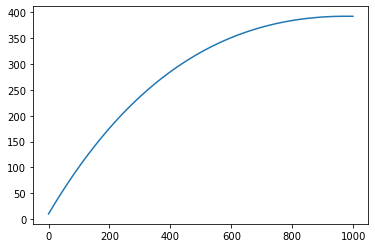

In [17]:
pos, vel, acc = generate(0.271828, 1000, 10, 100)
plt.plot(pos)
df = pd.DataFrame([pos, vel, acc]).T
df = df.rename(columns={0: "pos", 1: "vel", 2: "acc"})
df.to_csv("task2.txt", index=False)

In [21]:
df = pd.read_csv("task2.txt")
vel = np.array(df["vel"])
R_ans = (-acc[0] * m_ans + g) / vel[1]
print(R_ans)

0.2723333198139405


## Hard

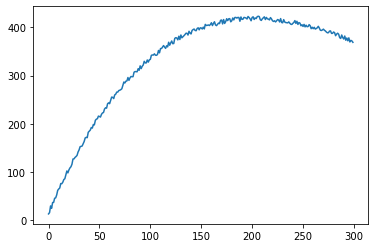

In [8]:
pos, vel, acc = generate(0.245, 300, 10, 100, dt=0.05)
pos = pos + np.random.random(300)*10
plt.plot(pos)
df = pd.DataFrame([pos]).T
df = df.rename(columns={0: "pos"})
df.to_csv("task3.txt", index=False)

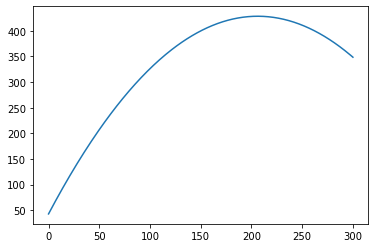

In [213]:
data = pos
fit = np.polyfit(range(300), data, 2)
x = np.linspace(0, 300, 300)
plt.plot(x, fit[2] + fit[1] * x + fit[0] * x**2)

## Exercises

**a)** What is the drag coefficient?

**b)** When will the ball hit the ground?